# Lecture 2 Homework Assignment

In this problem, you will revisit the unemployment insurance experiment performed by the US department of labor in the 1980s. Unemployment insurance reduces the risks and the costs associated with being unemployed. On the other hand, it incentives people to put less effort into getting a job, which negatively affects the economy. One possible solution is to offer a monetary bonus for finding a new job quickly.

To assess the effectiveness of this potential solution, the department of labor randomly split the unemployed into control and treatment groups and offered a cash bonus for finding a job within a certain period of time to the latter. The data is contained in `penn.csv` and described in the codebook posted on the class website.


1) Select a subsample that only includes the control group and one of the treated groups, `tg = 0` and, say, `tg = 4`.

In [245]:
import numpy as np
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('penn.csv')

# use treatment group 4 as the subsample
treatment_grp = 4

# create dataframe from subsample of data, with only tg = 0 and tg = 4
sub_ds = dataset[dataset['tg'].isin([0,treatment_grp])]


2) Define the outcome variable to be the logarithm of the number of weeks $Y = \log(\verb|inuidur1|)$, create the treatment indicator $D = 1(\verb|tg = 4|)$, and a vector of controls $W = (\text{sex, race, and age dummies})$.


In [246]:
# define outcome variable as log(inuidur1)
sub_ds['log_inuidur1'] = np.log(sub_ds['inuidur1'])

# treatment indicator D = 1 if tg = 4
sub_ds['D'] = np.where(sub_ds['tg']== treatment_grp, 1, 0)

sub_ds.head()

/var/folders/16/f2lcjdn174n2mbc1pd7lybzc0000gn/T/ipykernel_985/713937631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_ds['log_inuidur1'] = np.log(sub_ds['inuidur1'])
/var/folders/16/f2lcjdn174n2mbc1pd7lybzc0000gn/T/ipykernel_985/713937631.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_ds['D'] = np.where(sub_ds['tg']== treatment_grp, 1, 0)


,Unnamed: 0,abdt,tg,inuidur1,female,black,hispanic,othrace,dep,q1,...,q6,agelt35,agegt54,durable,nondurable,lusd,husd,muld,log_inuidur1,D
0,0,10824,0,18,0,0,0,0,2,0,...,0,0,0,0,0,0,1,0,2.890372,0
3,3,10824,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0.000000,0
4,4,10747,0,27,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3.295837,0
11,11,10607,4,9,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,2.197225,1
12,12,10831,0,27,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,3.295837,0


___
3) Assume that the conditional exogeneity assumption is satisfied. Estimate the model:

    $Y = \beta_0 + \beta_1 D + \epsilon$


    How do you interpret the coefficients? Under what assumptions do the coefficients have a *causal interpretation*? Do the results suggest that the program was successful in reducing the length of unemployment?

In [247]:
import statsmodels.api as sm
# estimate beta_0 + beta_1 D + epsilon
D = sub_ds['D']
X = sm.add_constant(D)
Y = sub_ds['log_inuidur1']
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           log_inuidur1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.686
Date:                Fri, 19 Jan 2024   Prob (F-statistic):             0.0171
Time:                        22:13:20   Log-Likelihood:                -8223.8
No. Observations:                5099   AIC:                         1.645e+04
Df Residuals:                    5097   BIC:                         1.646e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0568      0.021     98.105      0.0

We get from this OLS model that $\hat{\beta}_0 = 2.0568$ and $\hat{\beta}_1 = -0.0855$. That is, the expected value of $\log(\verb|inuidur1|)$ is $2.0568$ under no treatment, and we expect a decrease of $0.0855$ in $\log(\verb|inuidur1|)$ when we apply the treatment. 

In order for us to interpret the coefficients causally, i.e that the effect of the treatment is a -0.0855 decrease in $\log(\verb|inuidur1|)$, we need to assume that the conditional exogeneity condition, i.e $\mathbb{E}[D\epsilon] = 0$ is satisfied - that is to say, we can affect the outcome $Y$ only through the treatment $D$.

These results seem to suggest that the treatment was successful in reducing the length of unemployment, since the coefficient is negative and statistically significant at the 5% level.


___
4) Estimate the model:

    $Y = \beta_0 + \beta_1 D + + \beta_2'W + \epsilon$

    How do you interpret the coefficients? Under what assumptions do the coefficients have a causal interpretation? What is the difference with part (3)? Do the results suggest that the program was successful in reducing the length of unemployment?

In [248]:
# estimate beta_0 + beta_1 D + beta_2 W + epsilon

# define W as a vector of all additional covariates
W = sub_ds[['female', 'black', 'hispanic', 'othrace',
            'agelt35', 'agegt54']]

# estimate model
X = pd.concat([D, W], axis=1)
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           log_inuidur1   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     15.93
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           7.63e-21
Time:                        22:13:20   Log-Likelihood:                -8171.4
No. Observations:                5099   AIC:                         1.636e+04
Df Residuals:                    5091   BIC:                         1.641e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1360      0.035     60.883      0.0

We intepret the coefficients for this model in a similar way: $\hat{\beta}_0 = 2.136$ tells us the expected value $\log(\verb|inuidur1|)$ is $2.0568$ under no treatment for our sample, $\hat{\beta}_1 = -0.0801$ tells us that we expect a decrease of $0.0801$ in $\log(\verb|inuidur1|)$ when we apply the treatment, and $\hat{\beta}_2 = is a vector of all the other coefficients of our  age, race, and gender controls.

The difference between this model and the previous one is that this model takes into account other variables that might affect the outcome $Y$. This model thus attributes some of the outcome of $Y$ to covariates other than the treatment status $D$ - isolating our variable of interest from other factors that may influence duration of unemployment. Causal interpretation now hinges on two assumptions: the first is that the exogeneity condition is still satisfied, i.e $\mathbb{E}[D\epsilon] = 0$ and $\mathbb{E}$[We] = 0, and the second is that the covariates $W$ are not affected by the treatment $D$: $\mathbb{E}[W|D] = \mathbb{E}[W]$. 

The results do seem to suggest that the program helped reduce the length of unemployment, since the coefficient is negative and statistically significant at the 5% level.

___

5) Estimate the model:
    $Y = \beta_0 + \beta_1 D + + \beta_2'W + + \beta_3'WD + \epsilon$

    How do you interpret the coefficients? Do the results suggest that the model from part (3) was reasonable?

In [249]:
D_np_arr = D.to_numpy()
print(W.shape)
WD = W * D_np_arr[:, np.newaxis]

X = pd.concat([D, W, WD], axis=1)
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())


(5099, 6)
                            OLS Regression Results                            
Dep. Variable:           log_inuidur1   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     9.001
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           1.35e-18
Time:                        22:13:20   Log-Likelihood:                -8168.6
No. Observations:                5099   AIC:                         1.637e+04
Df Residuals:                    5085   BIC:                         1.646e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1666      0.041     52.90

Here, we intepret the coefficients $\beta_0, \beta_1, \beta_2$ in the same way as in part (4). The difference is that we now have an additional term $\beta_3'WD$, or interaction term, tells us the differential effect of each covariate in $W$ in relation to the treatment $D$ - for example, we see that the scalar coefficient for "female_D" is 0.0967, which would suggest (if taken at face value) that the treatment's effect on unemployment differs between males and females by 0.0967, on average. Of course, we must consider other factors such as the standard error of this coefficient, the p-value of this estimator, and the fact that the treatment is binary, so we cannot interpret this coefficient as a slope, etc.

The results of this model seem to suggest that the model from part (3) underestimated the effect of the treatment, since the coefficient for the treatment is now -0.1628, as opposed to -0.0855 in part (3).



___
(6) Do your conclusions change for different treatment groups? (do not include all of the estimation results, just discuss them).

While using different treatment groups (i.e tg = 1, 2, 3) changes the value of the coefficient, the sign of $\beta_1$ remains negative. However, for treatment group 1, we find that the p-value for $\hat{\beta}_1$ is very large, notably it is greater $\alpha = 0.05$ and is thus not statistically significant at the 5% level for all three models. Other treatment groups have significant results for some models but not others: for example, treatment group 2 has a significant result for the model in part (3) and (4) but not for the model in part (5) - this seems to indicate that the treatment effect is not the same for all treatment groups, and brings into question the validity of our conclusions from just testing our subsample of treatment group 4, and furthermore, the effectiveness of the treatment itself.

___
### Question 2

Perform Monte-Carlo simulations to investigate performance of different weight- ing matrices $\Omega_n$ used in the $IV$ estimator. Below is a suggested roadmap. Use $M = 1000$ simulations and $n = 200$ observations.

___

0) Pick some true value $\beta = (\beta_1, \beta_1) \in \mathbb{R}^2$

In [250]:
def generate_beta():
    # generate beta_0 as a random number from a normal distribution, between -10 and 10
    beta_0 = np.random.normal(0, 10)
    # generate beta_1 as a random number from a normal distribution, between -10 and 10
    beta_1 = np.random.normal(0, 10)
    return np.array([beta_0, beta_1])


___
1) For each simulation, create $(Y_i, X_i, Z_i)_{i=1}^n$ where $d_Z > d_X$, $X$ is endogenous, and $Z$ is a valid instrument. To obtain interesting results, introduce some heteroskedasticity.

In [251]:
def generate_data(n, alpha, beta):
    # generate simulation data, where d_z > d_x, X is endogenous, and Z is a valid instrument.
    # n is the number of observations
    # beta is a vector of coefficients beta_0 and beta_1
    # return Y, X, Z
    # generate dz > dx
    Z = np.random.normal(loc = 10, scale = 3, size = (n, alpha.shape[0]))
    U = np.random.normal(0, 3, size = (n, 1))
    
    X_1 = Z @ alpha + U
    X_2 = np.random.normal(size = (n, 1))
    X = np.concatenate((X_1, X_2), axis = 1)

    V = U + np.random.normal(0, 4, size = (n, 1))
    Y = beta[0] * X_1 + beta[1] * X_2 + V


    return Y, X, Z

___
2) Calculate $\hat{\beta}_{n, j}^{IV} for j = 1, 2, 3$ using the three choices of $\Omega_n$

In [255]:
import matplotlib.pyplot as plt
def calculate_beta_iv(j, Y, X, Z):
    n, dZ = Z.shape
    if j == 0:
        omega = np.identity(dZ)
        return np.linalg.inv(X.T @ Z @ omega @ Z.T @ X) @ (X.T @ Z @ omega @ Z.T @ Y)
        
    elif j == 1:
        omega = np.linalg.inv((1/n) * Z.T @ Z)
        return np.linalg.inv(X.T @ Z @ omega @ Z.T @ X) @ (X.T @ Z @ omega @ Z.T @ Y)
        
    elif j == 2:
        beta_tilde = calculate_beta_iv(1, Y, X, Z)
        e = (Y - X @ beta_tilde).flatten()
        
        omega = np.zeros((dZ, dZ))
        for i in range(n):
            Zi = Z[i,:].reshape(-1, 1)
            omega += (Zi @ Zi.T) * (e[i]**2)
            
        omega = np.linalg.inv((1/n) * omega)
        return np.linalg.inv(X.T @ Z @ omega @ Z.T @ X) @ (X.T @ Z @ omega @ Z.T @ Y)

M = 1000 # number of simulations

def simulate(n, alpha, beta, j):
    Y, X, Z = generate_data(n, alpha, beta)
    beta_hat = calculate_beta_iv(j, Y, X, Z)
    return beta_hat 

def run_simulations(n, alpha, beta, j, M):
    beta_hat = np.zeros((M, 2))
    for i in range(M):
        beta_hat[i,:] = simulate(n, alpha, beta, j).flatten()
    colors = ['orange', 'green', 'blue']
    plt.hist(beta_hat[:,0], bins = 75, range=(beta[0] - 20, beta[0] + 20), color=colors[j])
    plt.axvline(x = beta[0], color='k', linestyle='--', alpha=0.4, lw=1)
    plt.title(f"Beta_0, n = {n}, j = {j + 1}")
    plt.show()
    plt.hist(beta_hat[:,1], bins = 75, range=(beta[1] - 25, beta[1] + 25), color=colors[j])
    plt.axvline(x = beta[1], color='k', linestyle='--', alpha=0.4, lw=1)
    plt.title(f"Beta_1, n = {n}, j = {j + 1}")
    plt.show()

beta = generate_beta()
alpha = np.array([[0.1],[0.2]])

___
3) Plot the histogram of $\hat{beta}^{IV}_{n, j}$ across simulations along with the true value. Compare the results.
How do your results change for $n = 30$ or $n = 500$?

The plotted results are included below.

In general, it appears that the estimators converge towards the true values, which are plotted as dotted lines on the histograms. The estimators for $\hat{\beta}_1$ seem to converge faster than the estimators for $\hat{\beta}_2$, which is to be expected since $\hat{\beta}_1$ is the coefficient for the endogenous variable $X$, while $\hat{\beta}_2$ is the coefficient for the instrument $Z$. From the histograms, there seems to be slightly more variance present under the first weighing matrix, j = 1. However, the difference between the matrices is not very significant, and is much overshadowed by the effect of simply increasing the number of observations, $n$.

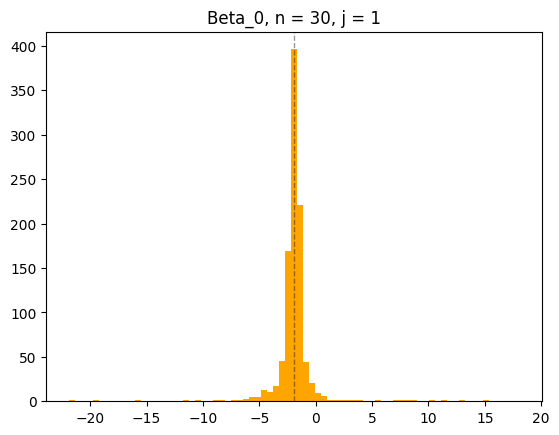

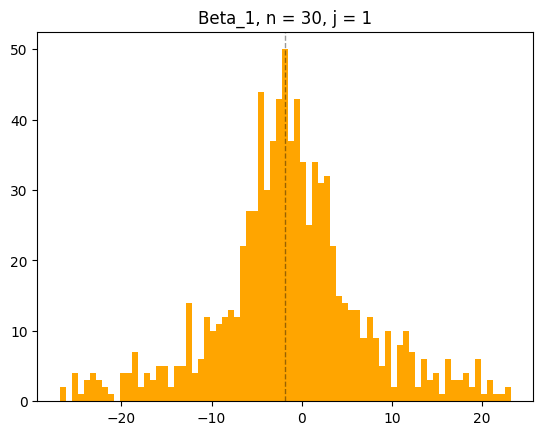

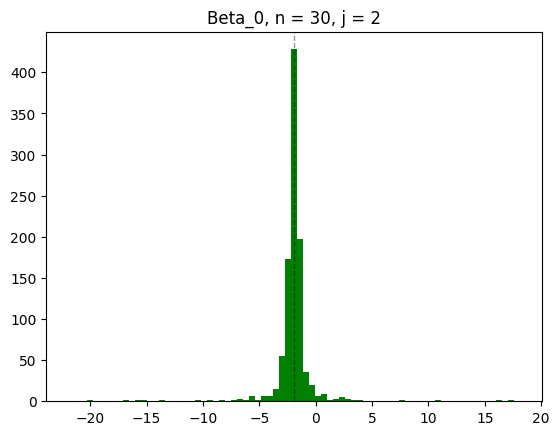

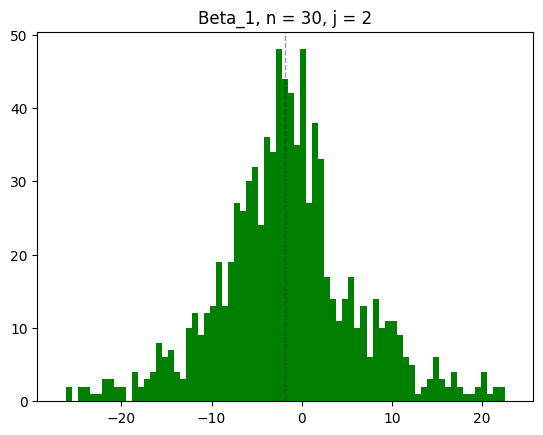

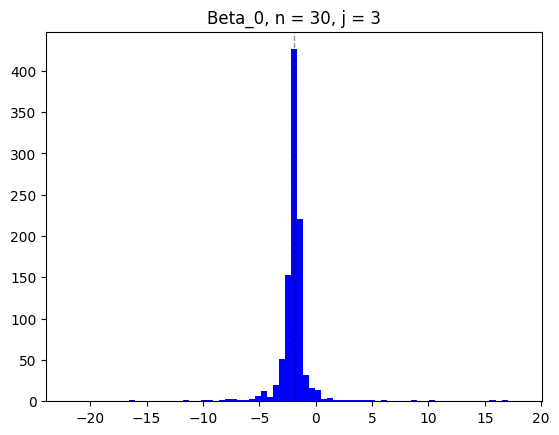

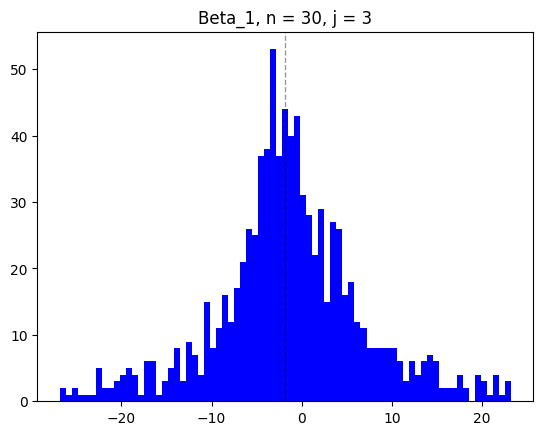

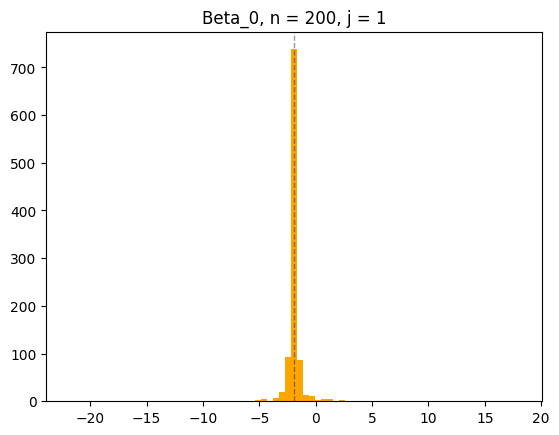

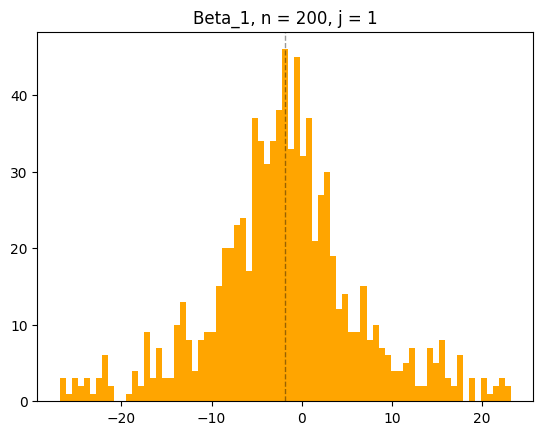

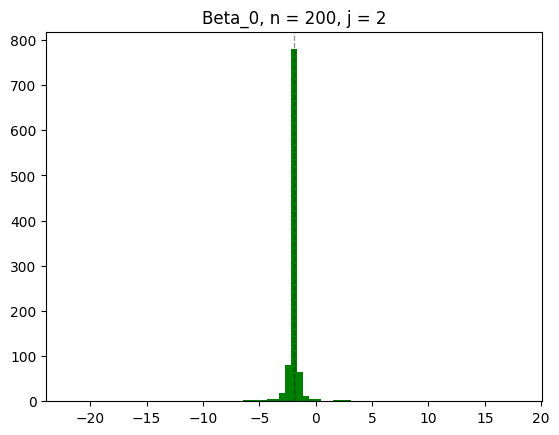

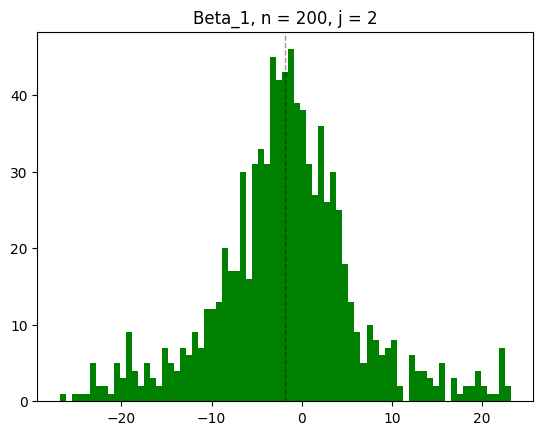

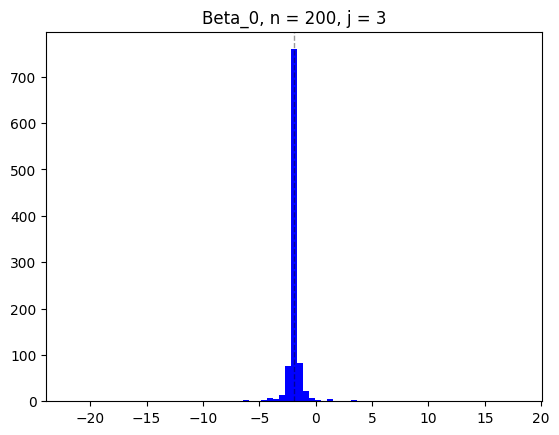

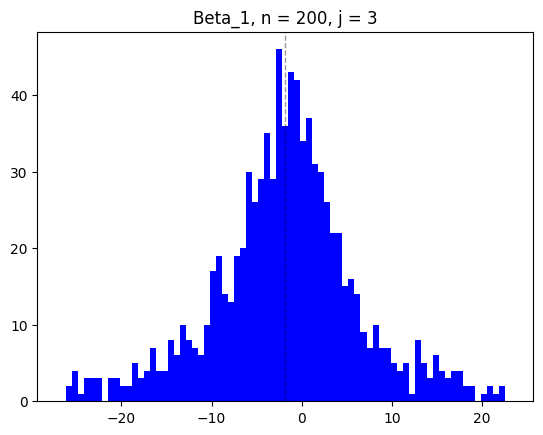

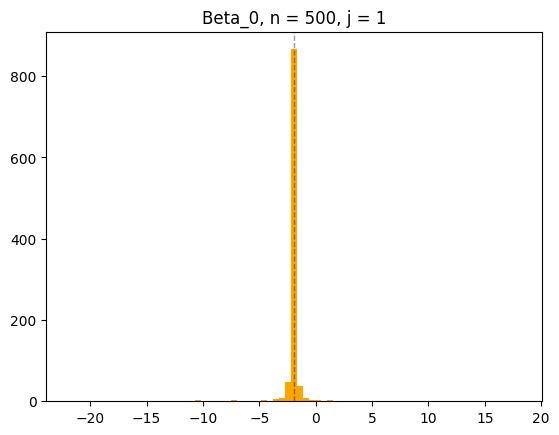

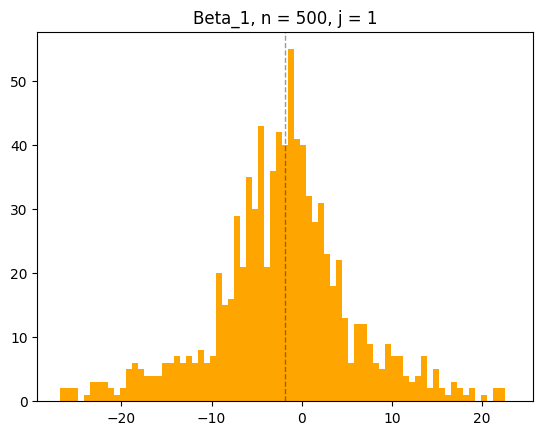

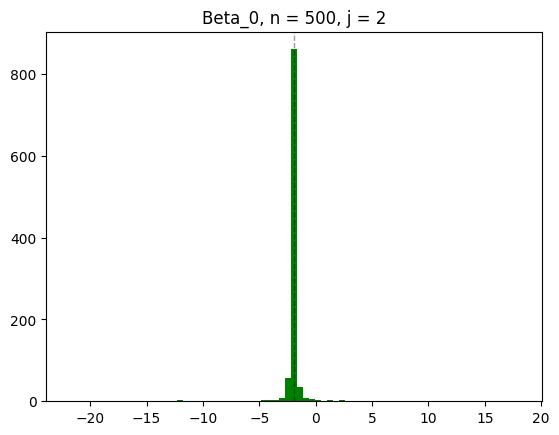

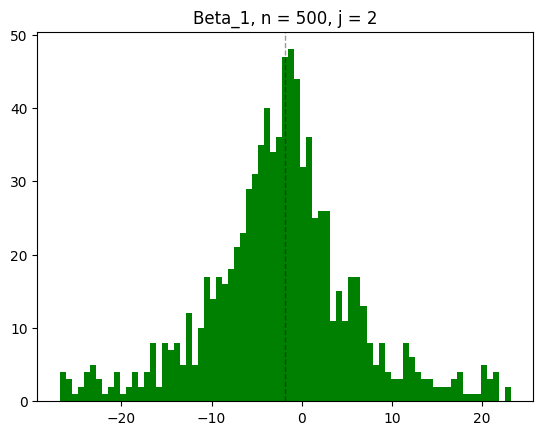

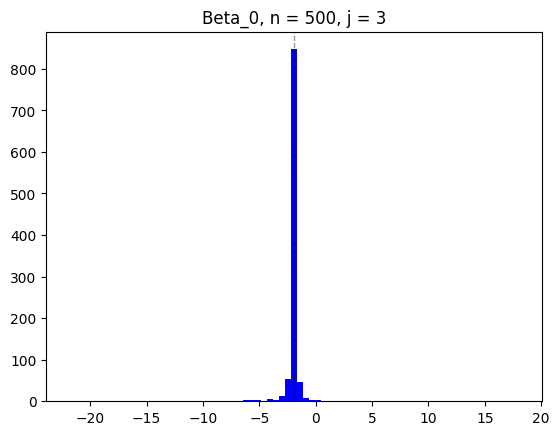

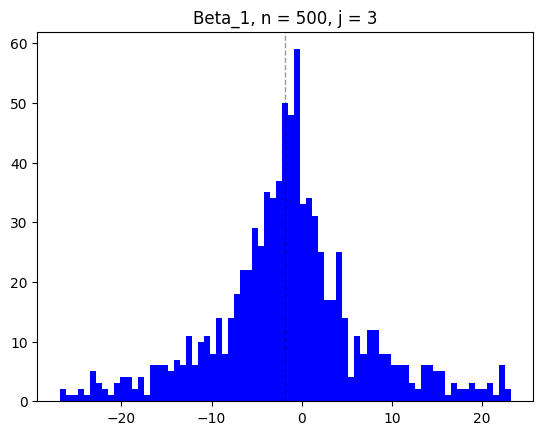

In [256]:
# Run simulations for j = 0, n = 30, 200, 500
n_values = [30, 200, 500]

for n in n_values:
    for j in range(3):
        run_simulations(n, alpha, beta, j, M)
